<a href="https://colab.research.google.com/github/BogdanT54/Serii-de-Timp/blob/Seminar6/Seminar6_SeriiTimp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalare și încărcare biblioteci necesare
install.packages(c("readxl","ggplot2","tidyverse", "tseries", "urca", "forecast","lmtest", "aTSA"), dependencies = TRUE)

# Curățare mediu de lucru și închidere grafice
rm(list = ls())
graphics.off()

# Încărcare biblioteci necesare
library(readxl)
library(ggplot2)
library(tidyverse)
library(tseries)
library(urca)
library(forecast)
library(lmtest)
library(aTSA)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘doBy’, ‘reformulas’, ‘classInt’, ‘s2’, ‘xts’, ‘TTR’, ‘pbkrtest’, ‘lme4’, ‘covr’, ‘Hmisc’, ‘mapproj’, ‘multcomp’, ‘sf’, ‘quantmod’, ‘forecTheta’, ‘seasonal’, ‘car’, ‘strucchange’, ‘sandwich’, ‘dynlm’, ‘AER’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following o

**readxl**: Citește date din fișiere Excel.

**ggplot2**: Creează grafice statistice.

**tidyverse**: Colecție de biblioteci pentru manipularea și vizualizarea datelor.

**tseries**: Analizează serii de timp (teste de staționaritate, ACF, PACF).

**urca**: Testează rădăcinile unitare în serii de timp.

**forecast**: Prognozează serii de timp (ARIMA, ETS).

**lmtest**: Testează ipotezele în modelele de regresie liniară.

**aTSA**: Analiză avansată a seriilor de timp.

In [3]:
# Citirea datelor
data <- read_excel("Rata_somajului.xlsx")

In [4]:
# Conversie în serie temporală
Somaj_ts <- ts(data$Somaj, start = c(2000, 1), end = c(2025, 2), frequency = 12)

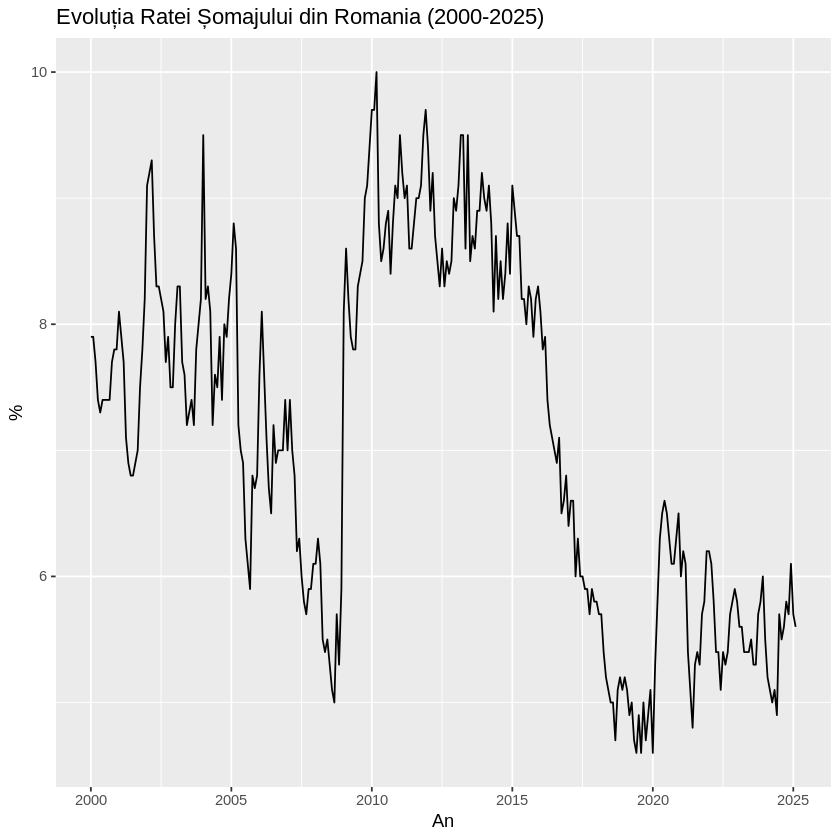

In [5]:
# **1. Grafic de tip linie care arata evoluția în timp a Ratei șomajului (Somaj_ts) + ACF și PACF pentru Somaj_ts**
autoplot(Somaj_ts) +
  ggtitle("Evoluția Ratei Șomajului din Romania (2000-2025)") +
  xlab("An") +
  ylab("%")

In [6]:
# **2. Impartirea setului de date original in train (antrenare) si test (testare). Vom pastra ultimii doi ani ca set de testare.

#Serii de timp pentru antrenare si testare
Somaj_ts_train <- ts(data$Somaj, start = c(2000, 1), end = c(2022, 12), frequency = 12)
Somaj_ts_test <- ts(data$Somaj, start = c(2023, 1), end = c(2025, 2), frequency = 12)

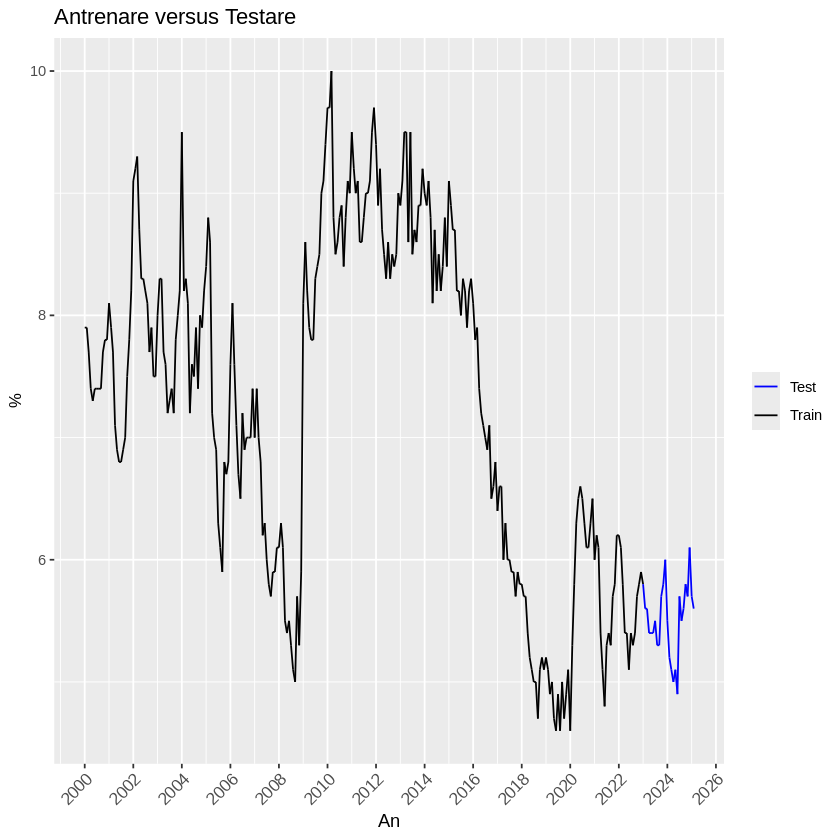

In [7]:
# Grafic set de antrenare vs testare
dates_all <- seq(as.Date("2000-01-01"), as.Date("2025-02-01"), by = "month")
df_all <- data.frame(Date = dates_all, Value = as.vector(Somaj_ts), Dataset = ifelse(dates_all >= as.Date("2023-01-01"), "Test", "Train"))

ggplot(df_all, aes(x = Date, y = Value, color = Dataset, group = 1)) +
  geom_line(linewidth = 0.5) +
  scale_color_manual(values = c("Train" = "black", "Test" = "blue")) +
  labs(title = "Antrenare versus Testare", y = "%", x = "An") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
        axis.title.y = element_text(size = 10),
        legend.title = element_blank()) +
  scale_x_date(date_breaks = "2 years", date_labels = "%Y")

,Data,Trend,Sezonalitate,Rezidual
,<date>,<dbl>,<dbl>,<dbl>
1,2000-01-01,NA,0.420486111,NA
2,2000-02-01,NA,0.450978535,NA
3,2000-03-01,NA,0.417834596,NA
4,2000-04-01,NA,0.025410354,NA
5,2000-05-01,NA,-0.267013889,NA
6,2000-06-01,NA,-0.255082071,NA
7,2000-07-01,7.600000,-0.255839646,0.05583965
8,2000-08-01,7.608333,-0.253756313,0.04542298
9,2000-09-01,7.608333,-0.337657828,0.12932449


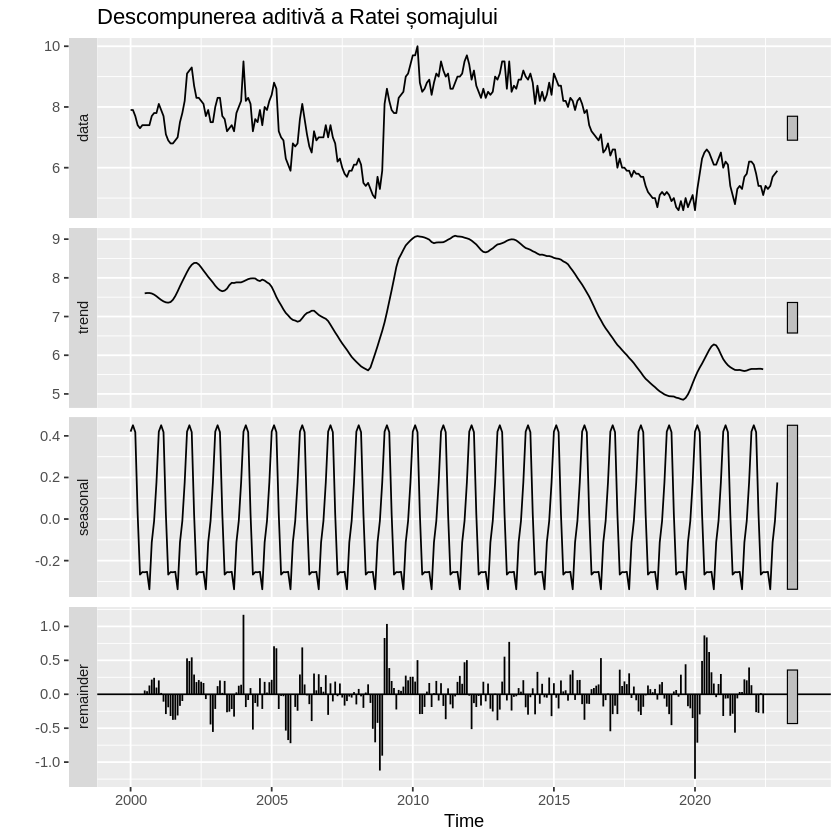

In [8]:
# ** 3. Descompunerea seriei de antrenare (metoda aditiva)
decomp <- decompose(Somaj_ts_train, type = "additive")  # poate fi utilizat si type ="multiplicative"

dates <- seq(from = as.Date("2000-01-01"), to = as.Date("2022-12-01"), by = "month")
df_decomp <- data.frame(
  Data = dates,
  Trend = decomp$trend,
  Sezonalitate = decomp$seasonal,
  Rezidual = decomp$random
)

head(df_decomp, 15)

#grafic
autoplot(decomp) + ggtitle("Descompunerea aditivă a Ratei șomajului")

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


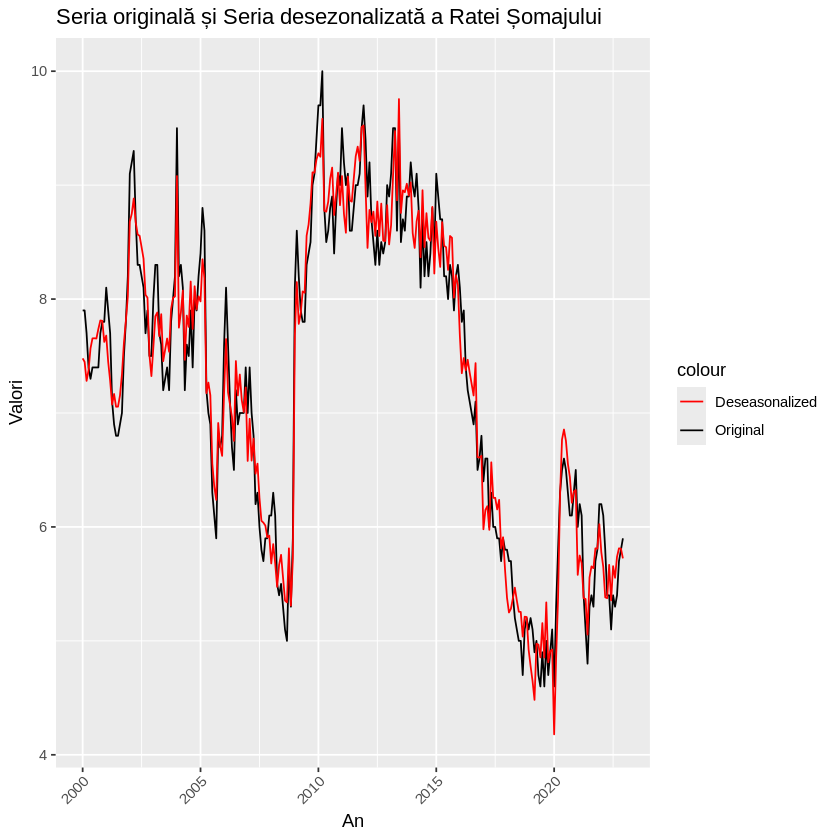

In [10]:
# **4. Desezonalizarea seriei de antrenare (training data)

# Desezonalizarea se face prin scăderea componentei sezoniere din seria originală
Somaj_ts_deseasonalized <- Somaj_ts_train - decomp$seasonal

# Grafic pentru a vizualiza seria desezonalizată + seria originală
# Crearea unui dataframe care conține atât seria originală cât și seria desezonalizată
df <- data.frame(
  Date = time(Somaj_ts_train),
  Original = as.vector(Somaj_ts_train),  # Seria originală
  Deseasonalized = as.vector(Somaj_ts_deseasonalized)  # Seria desezonalizată
)

ggplot(df, aes(x = Date)) +
  geom_line(aes(y = Original, colour = "Original"), size = 0.5) +  # Linia pentru seria originală
  geom_line(aes(y = Deseasonalized, colour = "Deseasonalized"), size = 0.5) +  # Linia pentru seria desezonalizată
  labs(title = "Seria originală și Seria desezonalizată a Ratei Șomajului",
       y = "Valori",
       x = "An") +
  scale_colour_manual(values = c("Original" = "black", "Deseasonalized" = "red")) +  # Setarea culorilor
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Înclinația etichetelor pe axa X


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10387 -0.20042  0.00467  0.18631  1.92817 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.3334056  0.1527390   2.183  0.02996 * 
z.lag.1     -0.0378370  0.0172845  -2.189  0.02950 * 
tt          -0.0004452  0.0003116  -1.429  0.15422   
z.diff.lag1 -0.1980478  0.0623095  -3.178  0.00166 **
z.diff.lag2  0.0512158  0.0634686   0.807  0.42045   
z.diff.lag3  0.1401333  0.0618665   2.265  0.02435 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3391 on 255 degrees of freedom
Multiple R-squared:  0.08149,	Adjusted R-squared:  0.06348 
F-statistic: 4.525 on 5 and 255 DF,  p-value: 0.0005712


Value of test-statistic is

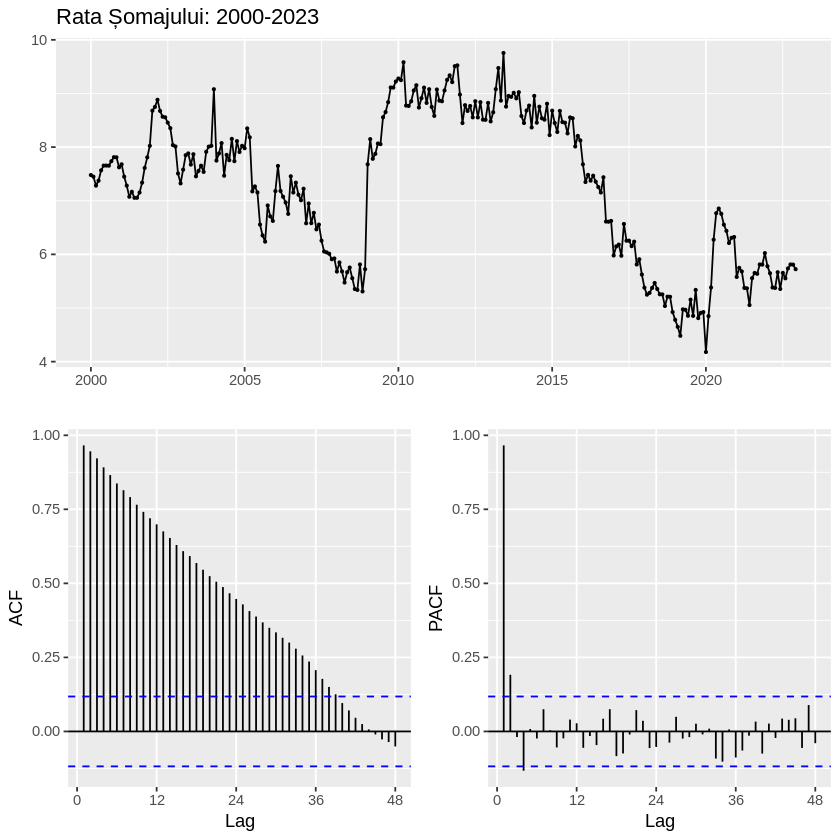

In [11]:
# **5. Testarea staționarității pentru Somaj_ts_deseasonalized**

# corelograma set de antrenare - desezonalizat
ggtsdisplay(Somaj_ts_deseasonalized, lag.max = 48, main = "Rata Șomajului: 2000-2023")


# Testul Augmented Dickey-Fuller (ADF) cu toate cele 3 specificatii: none, drift, trend
# H0: Seria este nestaționară. H1: Seria este staționară.

summary(ur.df(Somaj_ts_deseasonalized, type = "trend", lags = 14, selectlags = "AIC")) # type = "none" sau type = "drift"

**Interpretare rezultate ADF:**
    # Valoarea statisticii ADF este -2.1891
    # Valorile critice pentru ADF sunt: 1%: -3.98, 5%: -3.42, 10%: -3.13
 Concluzie: Deoarece valoarea statisticii PP (-2.1891) este mai mica in modul decât valorile critice la 1%, 5% și 10%, nu respingem H0.
           Seria este nestationară in nivel conform ADF.

In [12]:
# Testul Phillips-Perron (PP)
# H0: Seria este nestaționară. H1: Seria este staționară.

summary(ur.pp(Somaj_ts_deseasonalized, type = "Z-tau", model = "trend")) # model = "constant"


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28807 -0.20793 -0.00517  0.17304  1.88850 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2819203  0.1239657   2.274   0.0237 *  
y.l1         0.9604048  0.0167936  57.189   <2e-16 ***
trend       -0.0003973  0.0002863  -1.388   0.1664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3402 on 272 degrees of freedom
Multiple R-squared:  0.9378,	Adjusted R-squared:  0.9374 
F-statistic:  2051 on 2 and 272 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -2.2059 

           aux. Z statistics
Z-tau-mu              2.7595
Z-tau-beta           -1.3585

Critical values for Z statistics: 
                     1pct      5pct     10pct
critica

**Interpretare rezultate PP:**
    # Valoarea statisticii PP: -2.2059
    # Valori critice: 1%: -3.99; 5%: -3.42; 10%: -3.13
Concluzie: Deoarece valoarea statisticii PP (-2.2059) este mai mică in modul decât valorile critice la 1%, 5% și 10%, nu respingem H0.
            Prin urmare, seria nu este staționară.

In [ ]:
# Testul Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
# H0: Seria este staționară. H1: Seria este nestaționară.

summary(ur.kpss(Somaj_ts_deseasonalized, type = "tau"))  # type = "mu" pentru specificatia constanta

**Interpretare rezultate KPSS:**

    # Valoarea statisticii KPSS: 0.5807
    # Valori critice: 1%: 0.216; 5%: 0.146; 10%: 0.119
 Concluzie: Deoarece valoarea statisticii KPSS (0.5807) este mai mare in modul decât valorile critice la 1%, 5% și 10%, respingem H0.
           Prin urmare, seria NU este staționară.

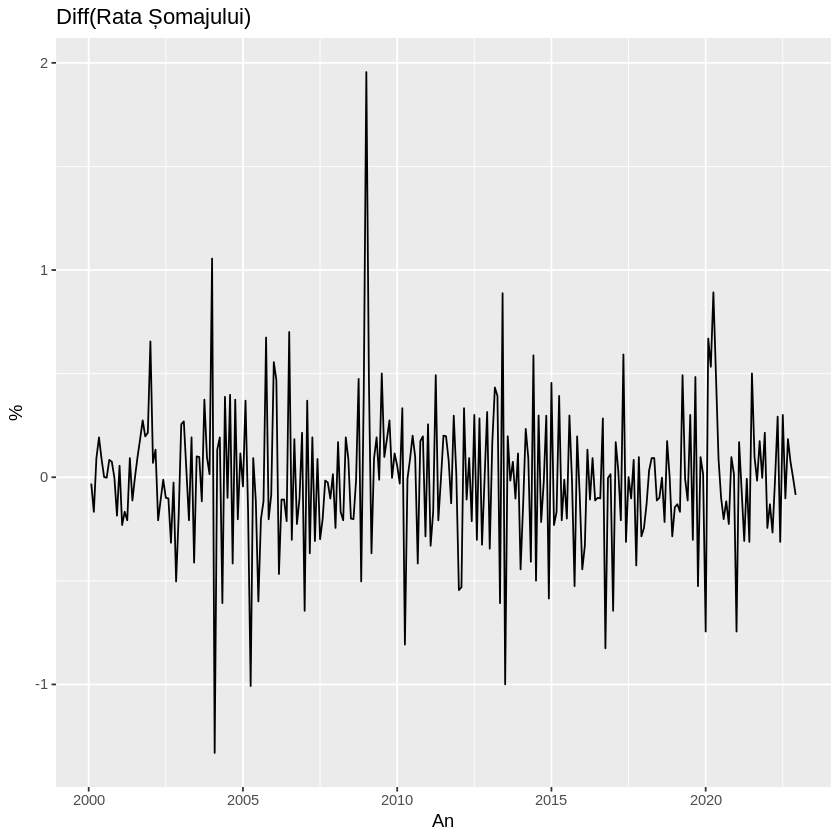

In [14]:
# **6. Diferențierea de ordin 1 a Somaj_ts_deseasonalized
Somaj_diff <- diff(Somaj_ts_deseasonalized)

autoplot(Somaj_diff) +
  ggtitle("Diff(Rata Șomajului)") +
  xlab("An") +
  ylab("%")

In [15]:
# **7. Teste de staționaritate pentru Somaj_diff (Testăm staționaritatea seriei diferențiate)

# Testul Augmented Dickey-Fuller (ADF)
summary(ur.df(Somaj_diff, type = "trend", lags = 14, selectlags = "AIC"))
# serie stationara la prima diferenta,
# statisticile ADF sunt mai mari in modul decat valorile critice pentru 1%, 5%, 10% => respingem ipoteza nula.

# Testul Phillips-Perron (PP)
summary(ur.pp(Somaj_diff, type = "Z-tau", model = "trend"))
# serie stationara la prima diferenta,
# statisticile PP sunt mai mari in modul decat valorile critice pentru 1%, 5%, 10% => respingem ipoteza nula.

# Testul Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
summary(ur.kpss(Somaj_diff, type = "tau"))
# serie stationara la prima diferenta,
#statisticile KPSS sunt mai mici in modul decat valorile critice pentru 1%, 5%, 10% => nu putem respinge ipoteza nula.


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11948 -0.19476 -0.00899  0.16973  2.00269 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0184392  0.0460218   0.401   0.6890    
z.lag.1     -1.0669107  0.1226409  -8.699 4.19e-16 ***
tt          -0.0001645  0.0002829  -0.581   0.5614    
z.diff.lag1 -0.1548979  0.0976916  -1.586   0.1141    
z.diff.lag2 -0.1246835  0.0619687  -2.012   0.0453 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3419 on 255 degrees of freedom
Multiple R-squared:  0.6173,	Adjusted R-squared:  0.6113 
F-statistic: 102.8 on 4 and 255 DF,  p-value: < 2.2e-16


Value of test-statistic is: -8.6995 25.2365 37.8521 

Critical values for te


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept and trend 


Call:
lm(formula = y ~ y.l1 + trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10502 -0.18563 -0.01011  0.19126  2.04934 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0075560  0.0203040  -0.372 0.710077    
y.l1        -0.2175641  0.0592932  -3.669 0.000293 ***
trend       -0.0001317  0.0002567  -0.513 0.608414    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.336 on 271 degrees of freedom
Multiple R-squared:  0.04794,	Adjusted R-squared:  0.04091 
F-statistic: 6.823 on 2 and 271 DF,  p-value: 0.001285


Value of test-statistic, type: Z-tau  is: -20.3226 

           aux. Z statistics
Z-tau-mu             -0.3354
Z-tau-beta           -0.5080

Critical values for Z statistics: 
                     1pct      5pct     10pct
critic


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 5 lags. 

Value of test-statistic is: 0.0495 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


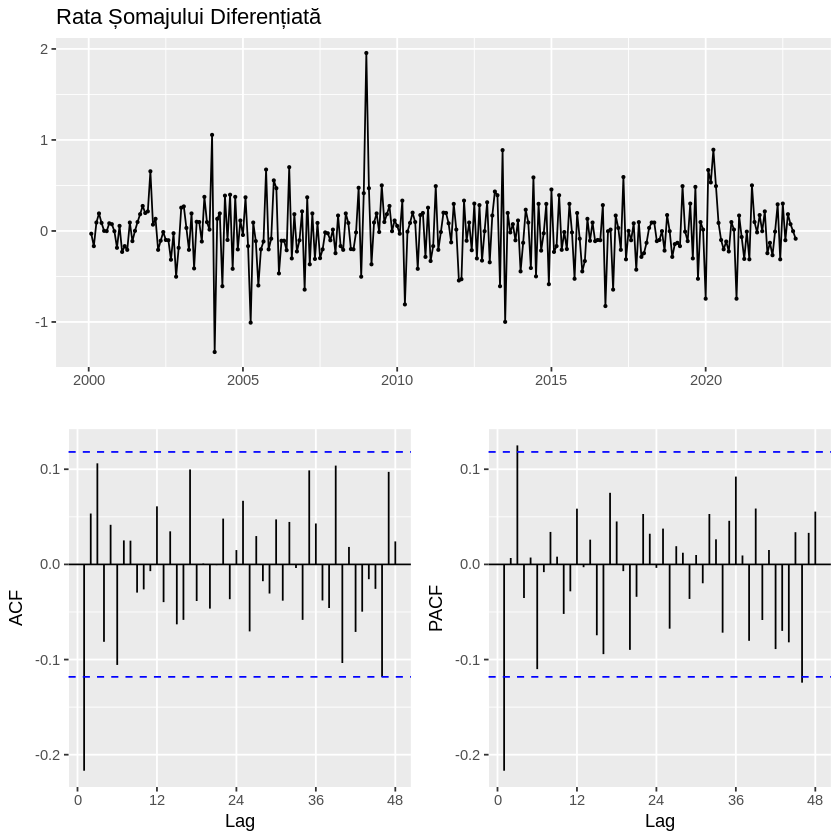

In [16]:
# **7. Corelograma pentru seria diferențiată Somaj_diff
ggtsdisplay(Somaj_diff, lag.max = 48, main = "Rata Șomajului Diferențiată")

In [19]:
# **8.1. Estimarea modelelor candidate
fit1 <- arima(Somaj_ts_deseasonalized, order=c(1,1,1))
fit2 <- arima(Somaj_ts_deseasonalized, order=c(3,1,1))
fit3 <- arima(Somaj_ts_deseasonalized, order=c(1,1,0))
fit4 <- arima(Somaj_ts_deseasonalized, order=c(0,1,1))


Call:
arima(x = Somaj_ts_deseasonalized, order = c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.2293  0.0143
s.e.   0.1891  0.1891

sigma^2 estimated as 0.1114:  log likelihood = -88.52,  aic = 183.04

Training set error measures:
                       ME      RMSE      MAE        MPE    MAPE      MASE
Training set -0.007613699 0.3332243 0.238652 -0.2505956 3.37749 0.9697472
                      ACF1
Training set -0.0008034929


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)
ar1 -0.229265   0.189145 -1.2121   0.2255
ma1  0.014265   0.189147  0.0754   0.9399



	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 16.368, df = 22, p-value = 0.7972

Model df: 2.   Total lags used: 24




	Jarque Bera Test

data:  residuals(fit1)
X-squared = 385.25, df = 2, p-value < 2.2e-16


ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 11.0  0.0264
[2,]     8 12.5  0.1284
[3,]    12 13.4  0.3413
[4,]    16 18.6  0.2887
[5,]    20 20.4  0.4348
[6,]    24 21.8  0.5911
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 309.2 0.00e+00
[2,]     8 142.3 0.00e+00
[3,]    12  89.4 2.22e-14
[4,]    16  59.4 3.16e-07
[5,]    20  42.5 1.51e-03
[6,]    24  33.4 7.37e-02


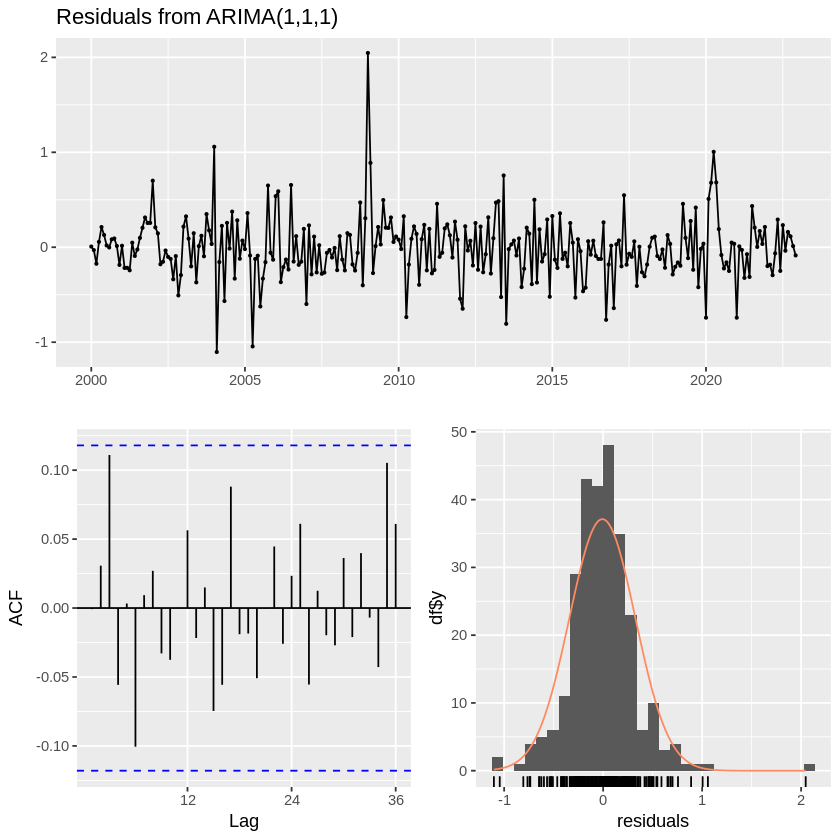

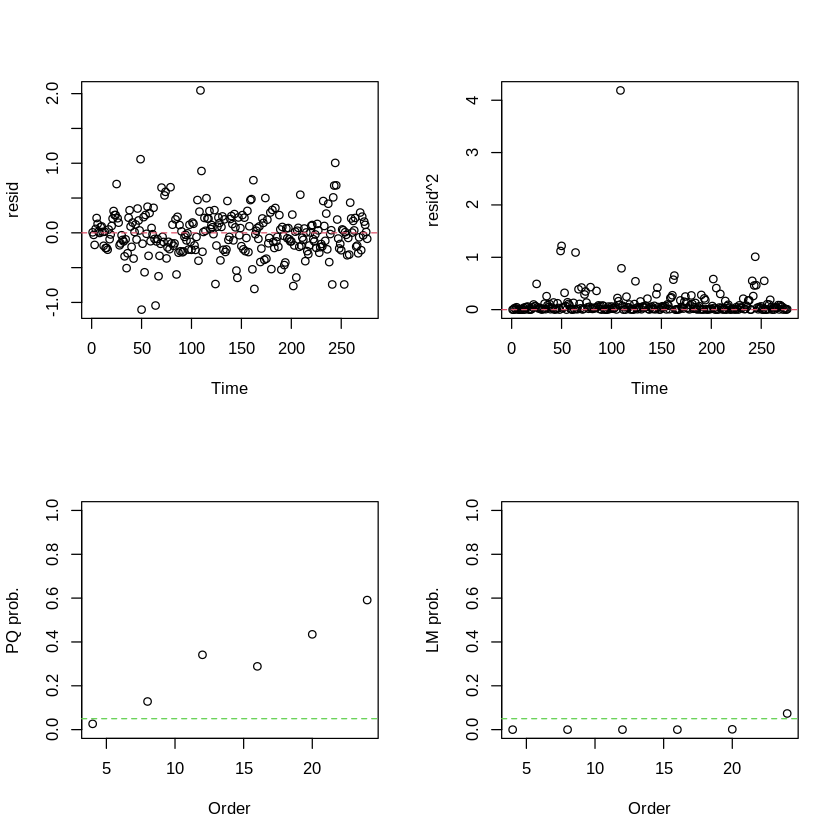

In [20]:
# **8.2. Validare modelelor candidate
summary(fit1)
coeftest(fit1)
checkresiduals(fit1)
# Normalitatea reziduurilor
jarque.bera.test(residuals(fit1))
# Heteroscedasticitatea reziduurilor
arch.test(fit1, output = TRUE)


Call:
arima(x = Somaj_ts_deseasonalized, order = c(3, 1, 1))

Coefficients:
          ar1      ar2     ar3     ma1
      -0.7378  -0.0801  0.1181  0.5329
s.e.   0.3630   0.1115  0.0655  0.3650

sigma^2 estimated as 0.1094:  log likelihood = -85.97,  aic = 181.95

Training set error measures:
                       ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.007023521 0.3301138 0.2384449 -0.2295492 3.366536 0.9689057
                     ACF1
Training set -0.003562123


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar1 -0.737829   0.362994 -2.0326  0.04209 *
ar2 -0.080119   0.111451 -0.7189  0.47222  
ar3  0.118127   0.065547  1.8022  0.07152 .
ma1  0.532927   0.364993  1.4601  0.14426  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(3,1,1)
Q* = 12.529, df = 20, p-value = 0.8967

Model df: 4.   Total lags used: 24




	Jarque Bera Test

data:  residuals(fit2)
X-squared = 362.65, df = 2, p-value < 2.2e-16


ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 13.2  0.0106
[2,]     8 14.5  0.0689
[3,]    12 15.4  0.2197
[4,]    16 20.6  0.1952
[5,]    20 22.4  0.3218
[6,]    24 23.7  0.4811
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 291.4 0.00e+00
[2,]     8 134.3 0.00e+00
[3,]    12  84.6 1.88e-13
[4,]    16  56.2 1.10e-06
[5,]    20  40.2 3.09e-03
[6,]    24  31.6 1.09e-01


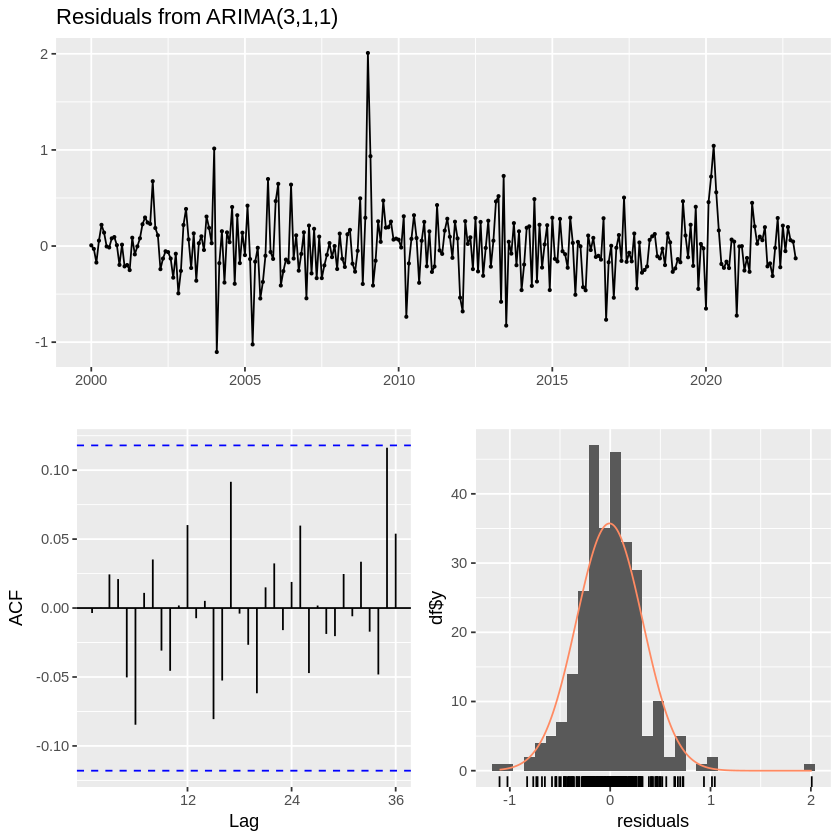

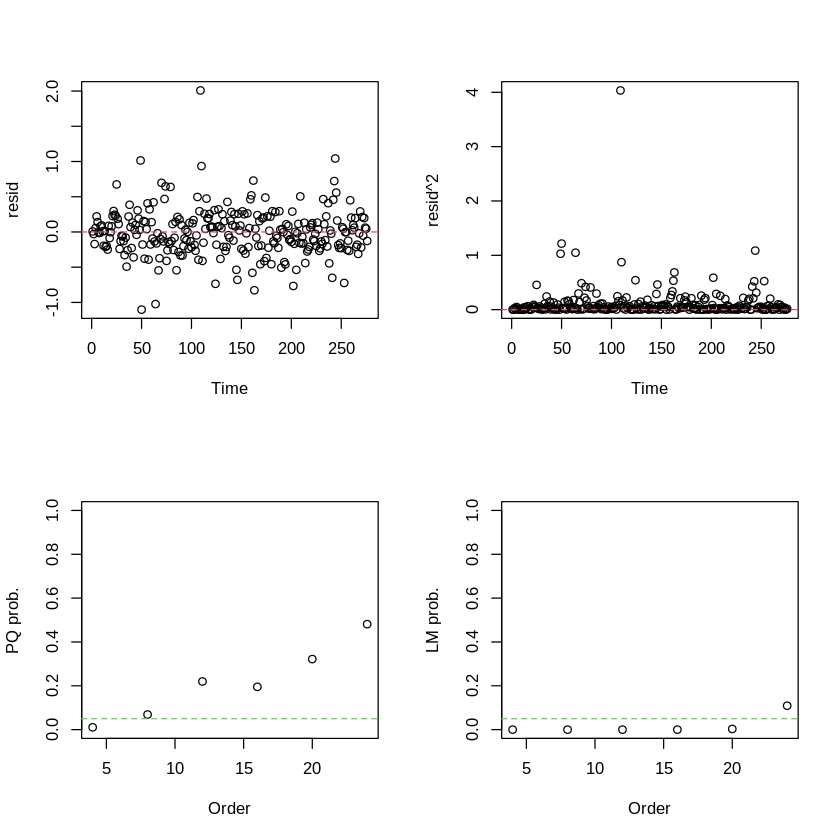

In [21]:
summary(fit2)
coeftest(fit2)
checkresiduals(fit2)
jarque.bera.test(residuals(fit2))
arch.test(fit2, output = TRUE)


Call:
arima(x = Somaj_ts_deseasonalized, order = c(1, 1, 0))

Coefficients:
          ar1
      -0.2157
s.e.   0.0588

sigma^2 estimated as 0.1114:  log likelihood = -88.53,  aic = 181.05

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.007635992 0.3332282 0.2386772 -0.251237 3.377894 0.9698495
                     ACF1
Training set 0.0002575242


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)    
ar1 -0.215678   0.058776 -3.6695 0.000243 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 16.341, df = 23, p-value = 0.8403

Model df: 1.   Total lags used: 24




	Jarque Bera Test

data:  residuals(fit3)
X-squared = 384.05, df = 2, p-value < 2.2e-16


ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 11.1  0.0252
[2,]     8 12.6  0.1246
[3,]    12 13.5  0.3341
[4,]    16 18.7  0.2830
[5,]    20 20.5  0.4282
[6,]    24 21.9  0.5845
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 307.8 0.00e+00
[2,]     8 141.6 0.00e+00
[3,]    12  88.9 2.68e-14
[4,]    16  59.2 3.49e-07
[5,]    20  42.3 1.60e-03
[6,]    24  33.3 7.60e-02


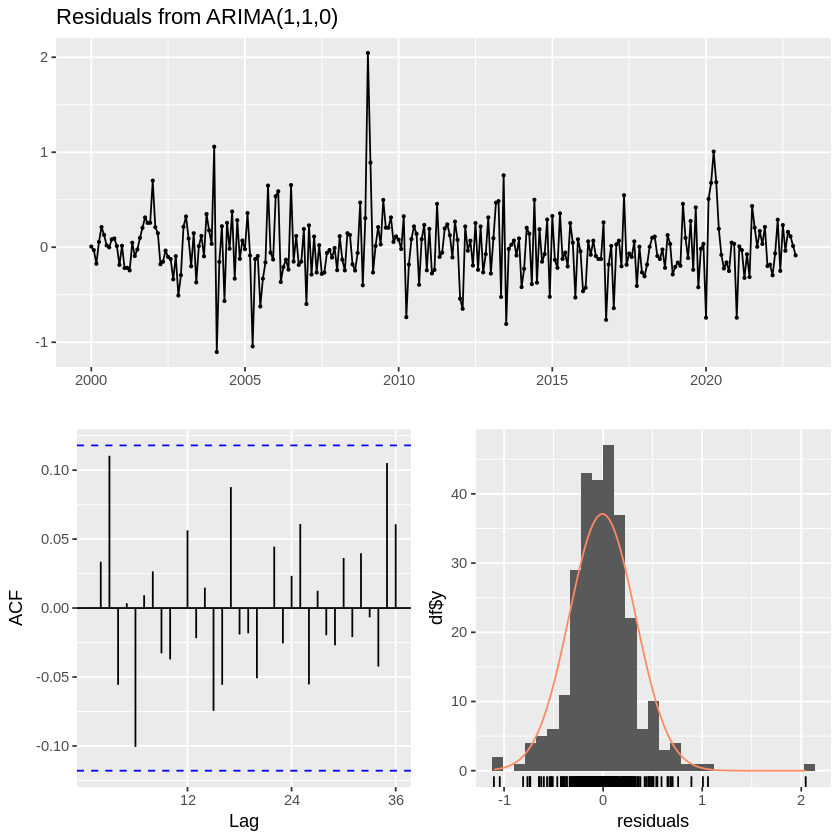

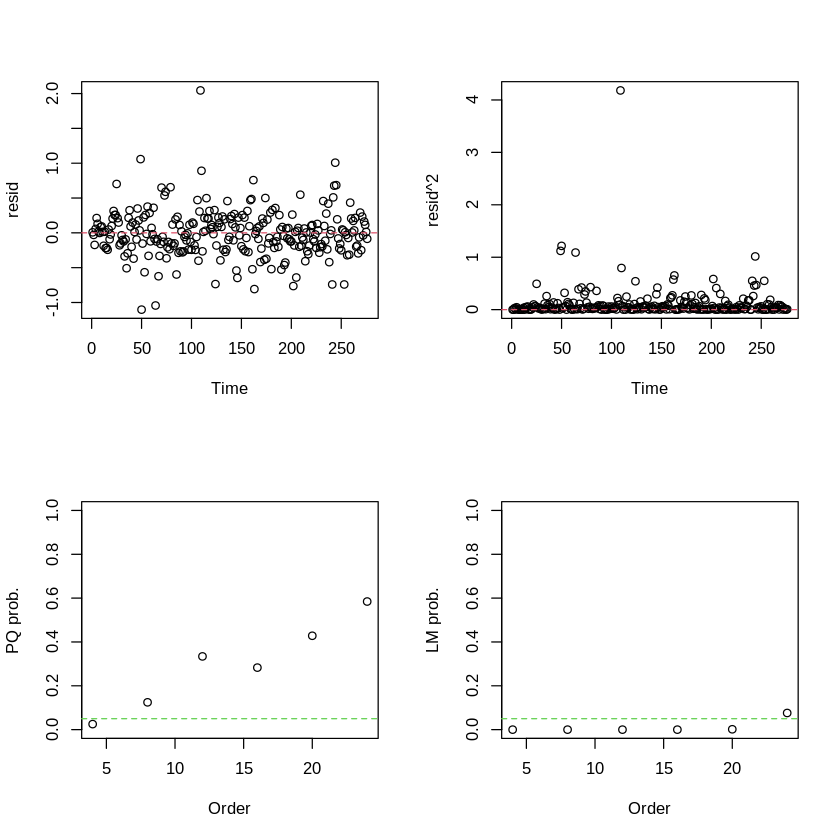

In [22]:
summary(fit3)
coeftest(fit3)
checkresiduals(fit3)
jarque.bera.test(residuals(fit3))
arch.test(fit3, output = TRUE)


Call:
arima(x = Somaj_ts_deseasonalized, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.1935
s.e.   0.0538

sigma^2 estimated as 0.1119:  log likelihood = -89.14,  aic = 182.27

Training set error measures:
                       ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.007784746 0.3339758 0.2400216 -0.2560103 3.396748 0.9753124
                    ACF1
Training set -0.01867874


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ma1 -0.193496   0.053818 -3.5954 0.0003239 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 17.221, df = 23, p-value = 0.7983

Model df: 1.   Total lags used: 24




	Jarque Bera Test

data:  residuals(fit4)
X-squared = 347.51, df = 2, p-value < 2.2e-16


ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 11.0  0.0271
[2,]     8 12.5  0.1313
[3,]    12 13.4  0.3414
[4,]    16 18.8  0.2772
[5,]    20 20.6  0.4187
[6,]    24 22.1  0.5760
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 297.7 0.00e+00
[2,]     8 136.7 0.00e+00
[3,]    12  85.8 1.09e-13
[4,]    16  57.1 7.94e-07
[5,]    20  40.8 2.56e-03
[6,]    24  32.1 9.86e-02


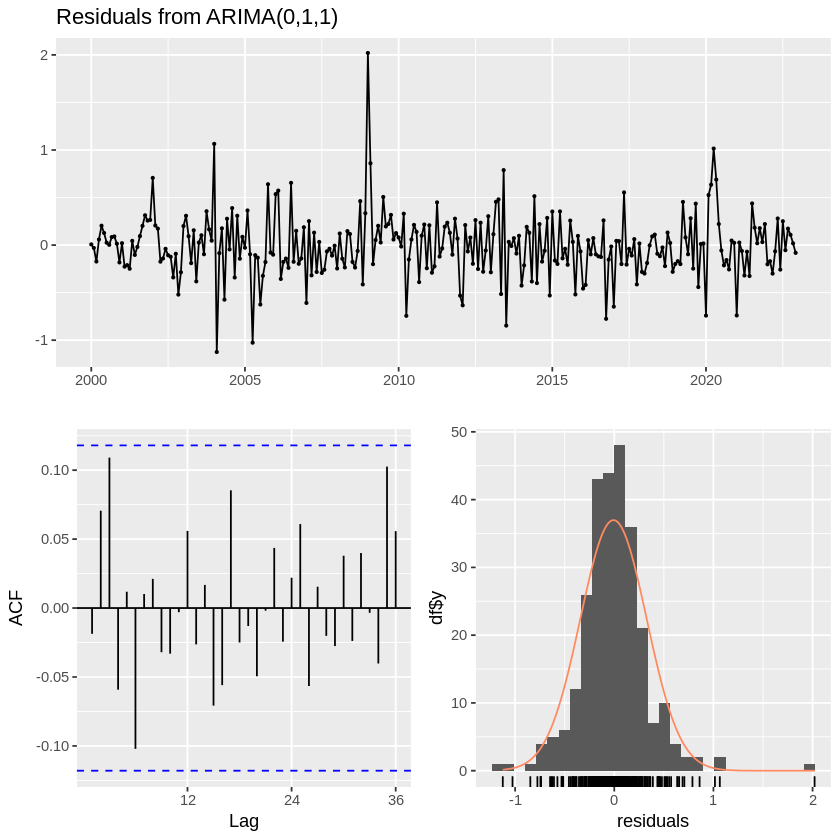

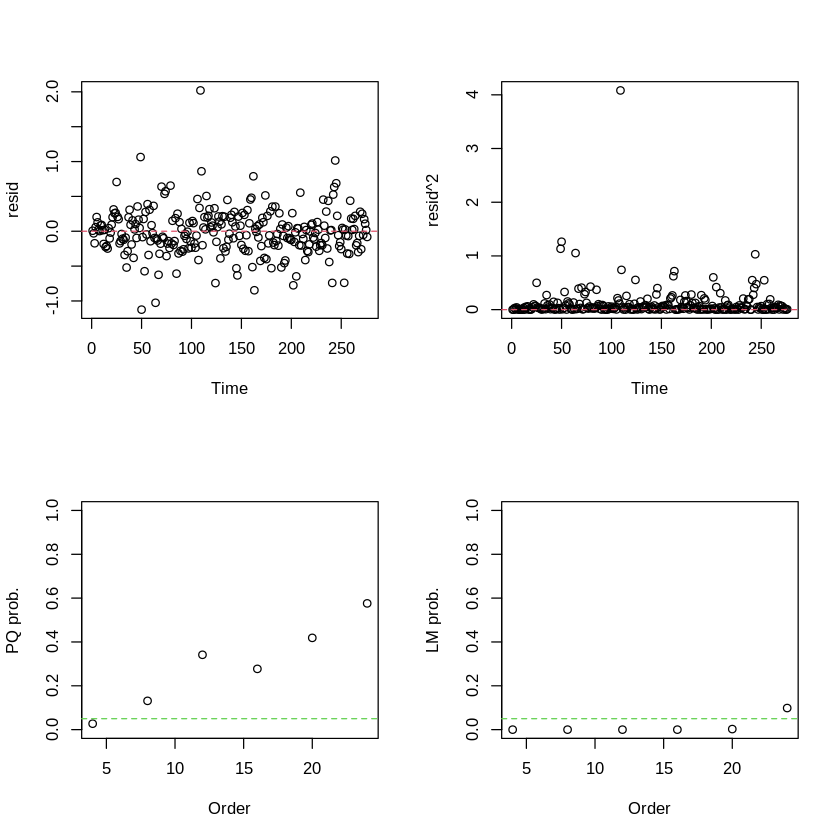

In [23]:
summary(fit4)
coeftest(fit4)
checkresiduals(fit4)
jarque.bera.test(residuals(fit4))
arch.test(fit4, output = TRUE)

In [24]:
# Criteriul Akaike pe setul de antrenare
fit1$aic
fit2$aic
fit3$aic
fit4$aic

# Criteriul Bayesian pe setul de antrenare
fit1$bic
fit2$bic
fit3$bic
fit4$bic

[1] 183.0448

[1] 181.9487

[1] 181.0512

[1] 182.2743

NULL

NULL

NULL

NULL

In [25]:
# **9. Identificarea modelului optim

fit_arima_accuracy3<- fit3 %>% forecast::forecast(h=36)
forecast::accuracy(fit_arima_accuracy3, Somaj_ts_test)

fit_arima_accuracy4<- fit4 %>% forecast::forecast(h=36)
forecast::accuracy(fit_arima_accuracy4, Somaj_ts_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.007635992,0.3332282,0.2386772,-0.251237,3.377894,0.3100924,0.0002575242,NA
Test set,1.879985611,1.9698879,1.8799856,24.250040,24.250040,2.4425010,0.7362749728,6.630459


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.007784746,0.3339758,0.2400216,-0.2560103,3.396748,0.311839,-0.01867874,NA
Test set,1.879394295,1.9693378,1.8793943,24.2421805,24.242181,2.441733,0.73625223,6.628051


ERROR: Error: object 'fit_arima_accuracy' not found


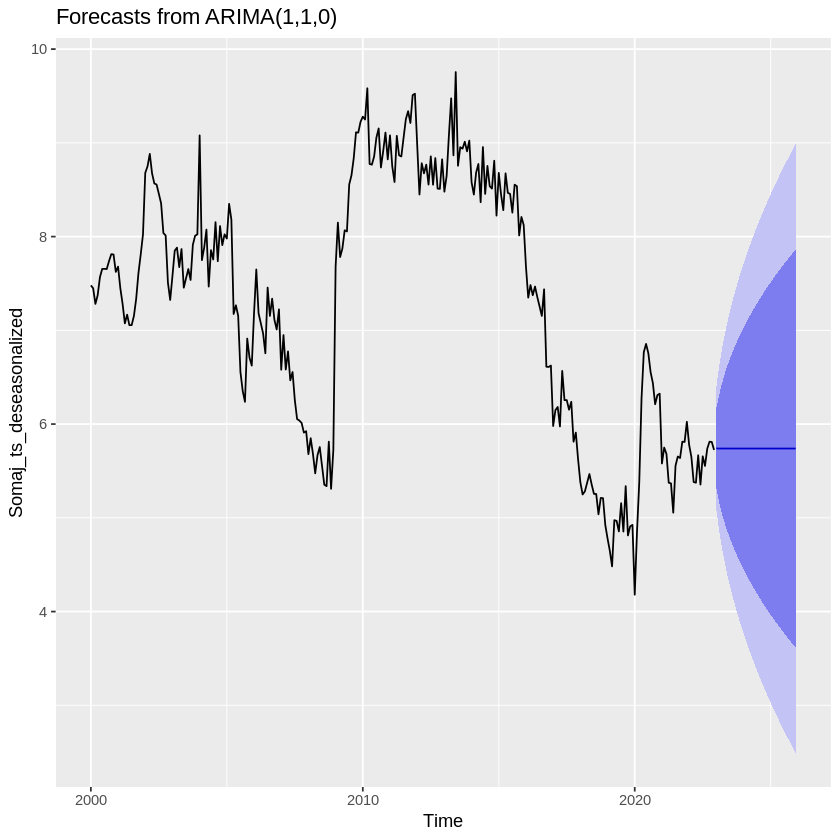

In [27]:
# **10. Prognoze utilizand modelul optim identificat
fit_arima_accuracy3 <- fit3 %>% forecast::forecast(h=36)
fit_arima_accuracy3 %>% forecast::forecast(h=36) %>%autoplot()

forecast_arima<- as.data.frame(fit_arima_accuracy[["mean"]])
forecast_arima<- ts(forecast_arima1, start=c(2023, 1), frequency=12)
forecast_arima

fit_arima_accuracy


autoplot(Somaj_ts) +
  autolayer(forecast_arima1, series = "Previziune") +
  xlab("Time") +
  ylab("%") +
  ggtitle("Previziuni ARIMA(1,1,0)") +
  guides(color = guide_legend(title = "", position = "bottom")) +
  theme(plot.title = element_text(hjust = 0.5),
        legend.position = "right",
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)) +
  scale_x_continuous(breaks = scales::extended_breaks(n = 12))